In [1]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()
uri = 'https://www.rochester.edu/newscenter/wp-content/uploads/2022/03/fea-ukraine-russian-war.jpg'
image = keras_ocr.tools.read(uri)
prediction_groups = pipeline.recognize([image])
prediction_groups

Looking for /Users/da/.keras-ocr/craft_mlt_25k.h5


2022-04-06 19:34:22.502611: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Looking for /Users/da/.keras-ocr/crnn_kurapan.h5


[[('stop',
   array([[340.50653 ,  63.549664],
          [630.94885 , 119.7643  ],
          [615.007   , 202.13039 ],
          [324.5647  , 145.91576 ]], dtype=float32)),
  ('war',
   array([[372.3992 , 193.9267 ],
          [630.728  , 225.4302 ],
          [616.72156, 340.28308],
          [358.39273, 308.77957]], dtype=float32)),
  ('lel',
   array([[459.17242, 459.06897],
          [486.06897, 469.82758],
          [483.10345, 477.2414 ],
          [456.2069 , 466.4828 ]], dtype=float32))]]

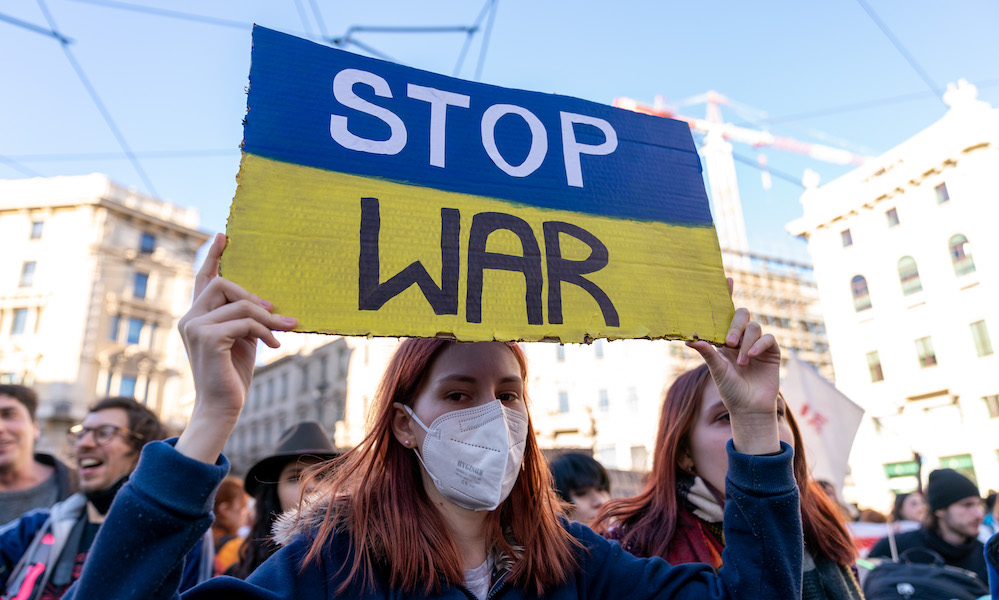

In [2]:
from rikai.types import Image
image = Image(uri).to_embedded()
image.to_pil()

In [3]:
from rikai.viz import Text
from rikai.types.geometry import Mask
def convert_pred_groups_for_rikai(pred_groups, width, height):
    result_groups = []
    for pred_group in pred_groups:
        result_group = []
        for pred in pred_group:
            text = pred[0]
            points = pred[1]
            poly = []
            for point in points:
                poly.append(point[0])
                poly.append(point[1])
            mask = Mask.from_polygon([poly], height, width)
            result = {'text': Text(text, (points[0][0]-10, points[0][1]-10)), 'mask': mask}
            result_group.append(result)
        result_groups.append(result_group)
    return result_groups

result_groups = convert_pred_groups_for_rikai(prediction_groups, image.to_pil().width, image.to_pil().height)
result_groups

[[{'text': <rikai.viz.Text at 0x7fa20a35b1c0>,
   'mask': Mask(type=Type.POLYGON, data=...)},
  {'text': <rikai.viz.Text at 0x7fa20a36cdc0>,
   'mask': Mask(type=Type.POLYGON, data=...)},
  {'text': <rikai.viz.Text at 0x7fa20a36cf10>,
   'mask': Mask(type=Type.POLYGON, data=...)}]]

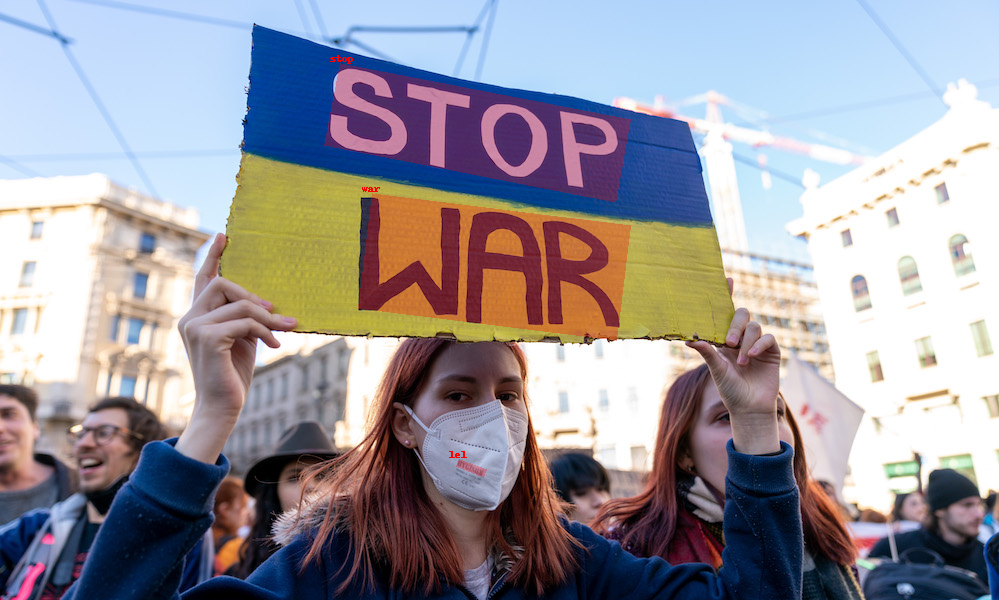

In [4]:
ocr_image = image
for result in result_groups[0]:
    ocr_image = ocr_image | result['mask'] | result['text']
ocr_image.to_image().to_pil()